In [5]:
import sys
sys.path.insert(0, '/home/tim/Classes/CS535/PlanarGrasping/')

from shapely.geometry import Polygon
from data_generation.utils import plot_shape, plot_sdf, plot_training_example
from data_generation.training_ex import TrainingExample
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [6]:
triangle = Polygon([(-1, -1), (1, -1), (0,1)])

In [7]:
te = TrainingExample(robx=-5, roby=5, shape=triangle)

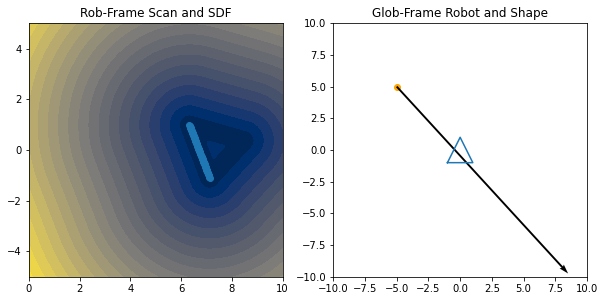

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10,10))
plot_training_example(te, axs)

In [18]:
help(plt.Axes.set_aspect)

Help on function set_aspect in module matplotlib.axes._base:

set_aspect(self, aspect, adjustable=None, anchor=None, share=False)
    Set the aspect of the axis scaling, i.e. the ratio of y-unit to x-unit.
    
    Parameters
    ----------
    aspect : {'auto'} or num
        Possible values:
    
        ========   =================================================
        value      description
        ========   =================================================
        'auto'     automatic; fill the position rectangle with data.
        num        a circle will be stretched such that the height
                   is *num* times the width.  'equal' is a synonym
                   for ``aspect=1``, i.e. same scaling for x and y.
        ========   =================================================
    
    adjustable : None or {'box', 'datalim'}, optional
        If not ``None``, this defines which parameter will be adjusted to
        meet the required aspect. See `.set_adjustable` fo

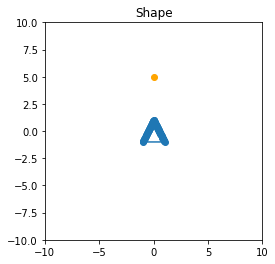

In [7]:
rob = Robot(y=5)

pts, x, y, angle = rob.narrow_scan(triangle)
fig, ax = plt.subplots()
plot_shape(triangle, ax)
ax.scatter(pts[:,0], pts[:,1])
ax.scatter(rob.x, rob.y, color='orange')

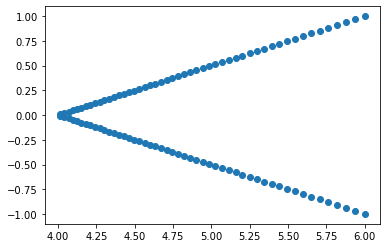

In [8]:
from data_generation.robot import glob_to_loc, local_sdf, global_sdf
fig, ax = plt.subplots()
locpts = glob_to_loc(pts, angle, rob.x, rob.y)
ax.scatter(locpts[:,0], locpts[:,1])

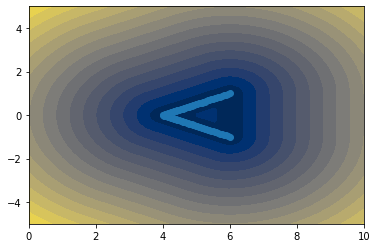

In [9]:
from data_generation.utils import plot_sdf
sdf = lambda x,y: local_sdf(triangle, np.array([[x,y]]), angle, rob.x, rob.y)[0]
fig, ax = plt.subplots()
plot_sdf(sdf, ax)
locpts = glob_to_loc(pts, angle, rob.x, rob.y)
ax.scatter(locpts[:,0], locpts[:,1])

In [10]:
sdf(4,0)

2.4492935982947064e-16

In [11]:
from data_generation.robot import loc_to_glob
loc_to_glob(np.array([[4,0]]), angle, rob.x, rob.y)

array([[2.4492936e-16, 1.0000000e+00]])

In [12]:
angle

-1.5707963267948966

In [13]:
rob.x, rob.y

(0, 5)